In [292]:
import pandas as pd
import seaborn as sn
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [306]:
data_2 = pd.read_csv('../Data/Data 2/owid-covid-data.csv')
data_3 = pd.read_csv('../Data/Data 3/data_PIB.csv', skiprows=6, header=None)
data_4 = pd.read_csv('../Data/Data 3/CPMNACSCAB1GQFR.csv')

data_2 = data_2[['location', 'date', 'total_cases', 'total_deaths', 'human_development_index', 'population', 'stringency_index', 'gdp_per_capita', 'extreme_poverty']]
data_2.columns = ['COUNTRY', 'DATE', 'TC', 'TD', 'HDI', 'POP', 'STI', 'GDPCAP', 'POVERTY']
data_2 = data_2[data_2.COUNTRY == 'France']
data_2['DATE'] = pd.to_datetime(data_2['DATE'])
data_2['Quarter'] = data_2['DATE']
data_2['Quarter'] = pd.PeriodIndex(data_2['Quarter'], freq='Q')
#data_2 = data_2[data_2.Quarter.isin(pd.PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
#       '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4'], freq='Q'))]
data_2.drop(['COUNTRY'], axis=1, inplace=True)

data_3.drop([2], axis=1, inplace=True)
data_3 = data_3[data_3[0] >= '2020Q1']
data_3.rename(
    columns={0: "Quarter", 1: "PBI_var"},
    inplace=True,
)
data_3.sort_values(by='Quarter', ascending=True, inplace=True)
data_3['Quarter'] = pd.PeriodIndex(data_3['Quarter'], freq='Q')

data_4.rename(
    columns={'CPMNACSCAB1GQFR': "GDP"},
    inplace=True,
)
data_4['Quarter'] = pd.PeriodIndex(data_4['DATE'], freq='Q')
#data_2.head(5)
#data_3.head(5)

In [307]:
print("data_2 columns : ", data_2.columns)
print('####################################################"')
print("data_3 columns : ", data_3.columns)
print('####################################################"')
print("data_4 columns : ", data_4.columns)

#data_2.head(5)
#data_3.head(5)

data_2 columns :  Index(['DATE', 'TC', 'TD', 'HDI', 'POP', 'STI', 'GDPCAP', 'POVERTY',
       'Quarter'],
      dtype='object')
####################################################"
data_3 columns :  Index(['Quarter', 'PBI_var'], dtype='object')
####################################################"
data_4 columns :  Index(['DATE', 'GDP', 'Quarter'], dtype='object')


In [329]:
data = data_2.merge(data_3, on='Quarter', how='outer')
data = data.merge(data_4, on='Quarter', how='inner')
#data = data.set_index('Quarter').join(data_4.set_index('Quarter'))
data = data.reset_index()
#data.DATE = pd.to_datetime(data.DATE, format='%Y%M%D')
data = data.fillna(0)
data.head(5)
data.GDP.unique()

array([585312.8, 525197.4, 598693.1, 600410.4, 606014.8, 615114.9,
       635644.7, 642048.5, 646767.9, 654785.2, 664448.9, 675691. ])

In [325]:
data.Quarter.unique().value_counts()

2020Q1    1
2020Q2    1
2020Q3    1
2020Q4    1
2021Q1    1
2021Q2    1
2021Q3    1
2021Q4    1
2022Q1    1
2022Q2    1
2022Q3    1
2022Q4    1
Freq: Q-DEC, dtype: int64

In [330]:
data_monthly = data.groupby('Quarter').agg({
                            'TC' : 'sum',
                            'TD' : 'sum',
                            'POP' : 'sum',
                            'HDI' : 'mean',
                            'STI' : 'mean',
                            'PBI_var' : 'mean',
                            'GDP' : 'mean',
                            'POVERTY' : 'mean'
}).reset_index()

In [331]:
data_monthly

,Quarter,TC,TD,POP,HDI,STI,PBI_var,GDP,POVERTY
0,2020Q1,3.513570e+05,18079.0,6.035357e+09,0.901,25.973708,-5.1,585312.8,0.0
1,2020Q2,1.188474e+07,2182933.0,6.170983e+09,0.901,78.101099,-18.6,525197.4,0.0
2,2020Q3,2.513838e+07,2795892.0,6.238796e+09,0.901,47.948370,-3.6,598693.1,0.0
3,2020Q4,1.628052e+08,4167965.0,6.238796e+09,0.901,65.664891,-4.2,600410.4,0.0
4,2021Q1,3.052732e+08,7225821.0,6.103170e+09,0.901,64.394889,1.5,606014.8,0.0
5,2021Q2,4.824409e+08,9565207.0,6.170983e+09,0.901,62.015275,18.7,615114.9,0.0
6,2021Q3,5.747582e+08,10291834.0,6.238796e+09,0.901,42.550435,3.6,635644.7,0.0
7,2021Q4,6.810192e+08,10709536.0,6.238796e+09,0.901,42.110543,5.1,642048.5,0.0
8,2022Q1,1.726454e+09,11803797.0,6.103170e+09,0.901,35.968222,4.8,646767.9,0.0
9,2022Q2,2.546944e+09,13054078.0,6.170983e+09,0.901,18.814286,4.2,654785.2,0.0


In [319]:
data_monthly['log_GDP'] = np.log(data_monthly.GDP)

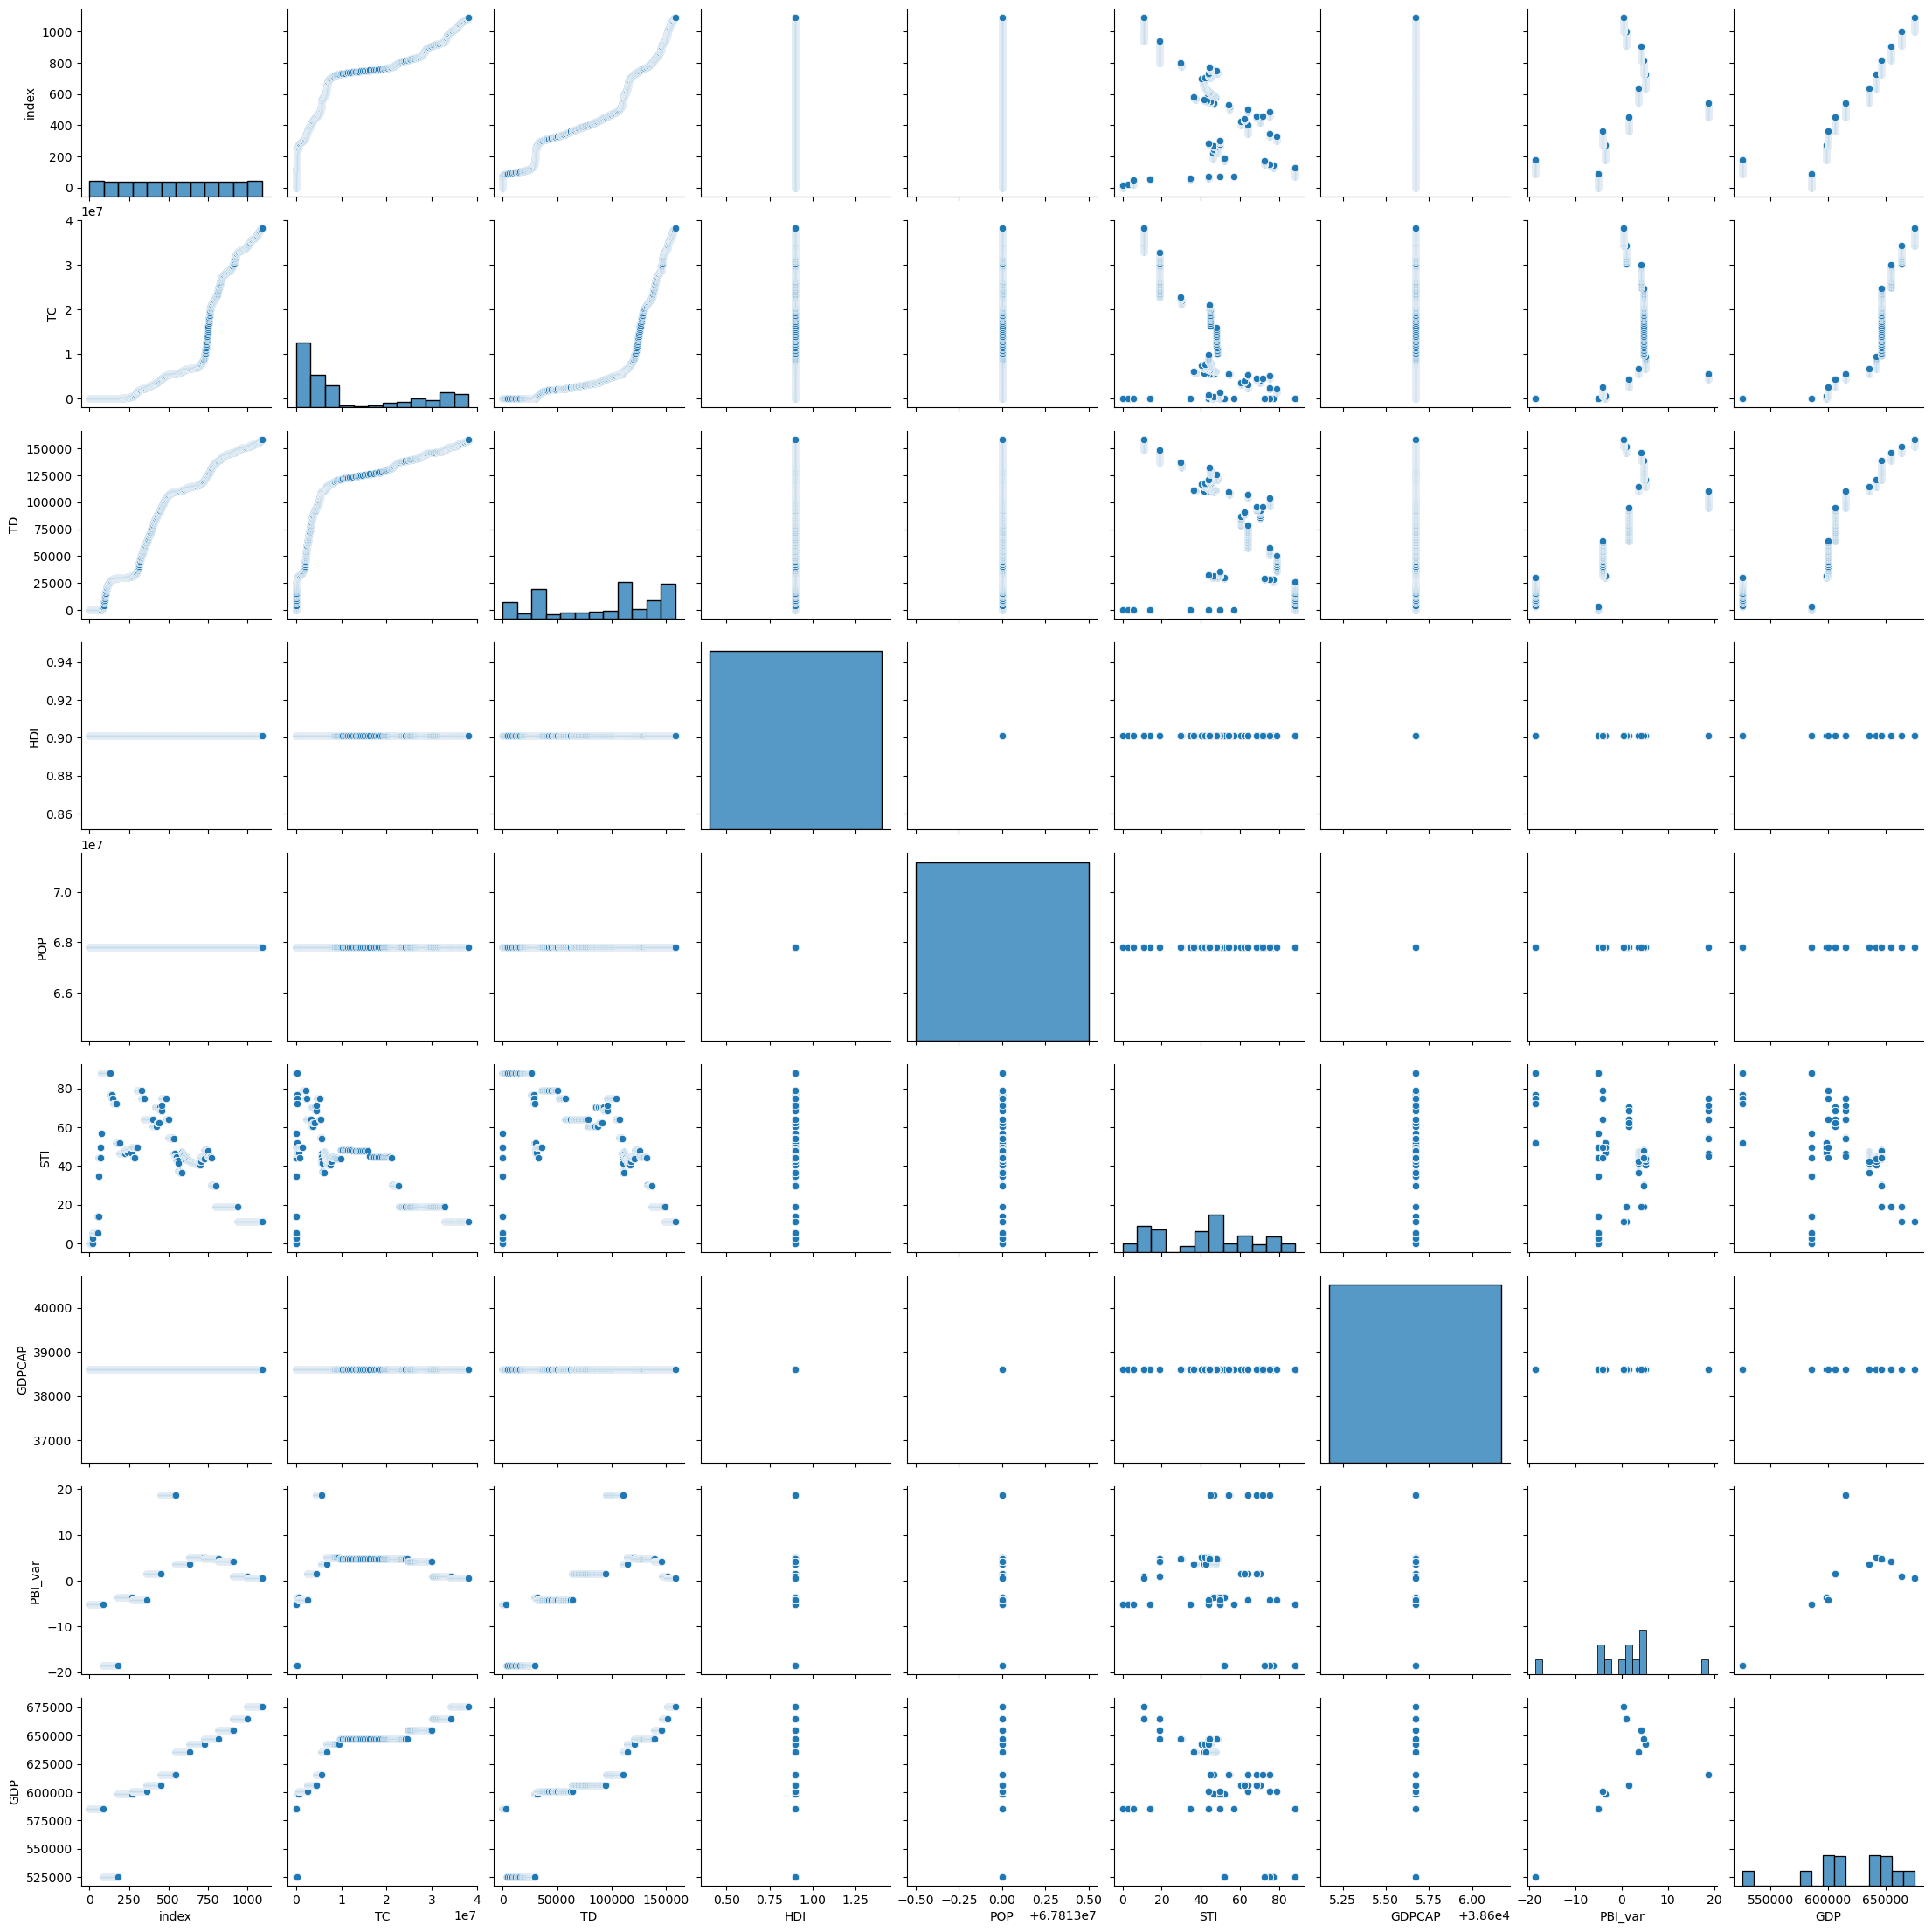

In [300]:
sn.pairplot(data)

<Axes: xlabel='STI', ylabel='HDI'>

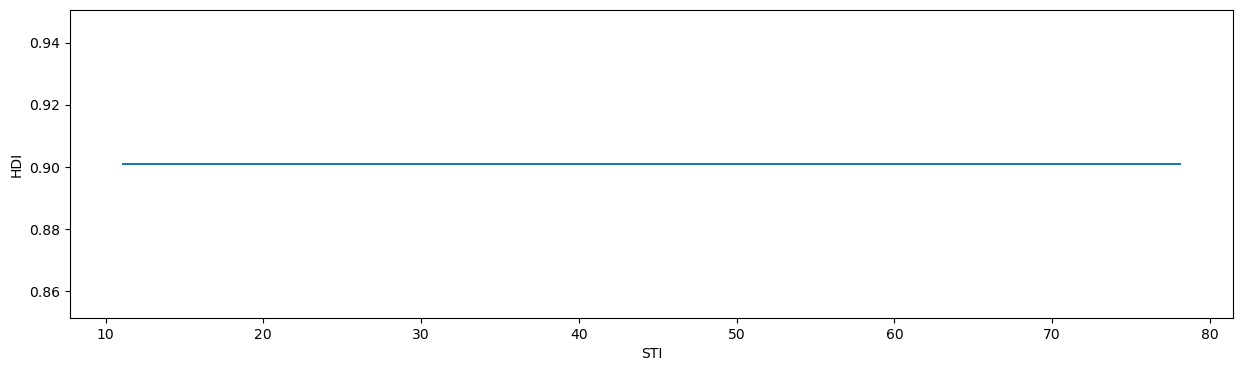

In [301]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_monthly, x='STI', y='HDI')
#sn.lineplot(data=data, x='DATE', y='PBI_var')
#sn.barplot(data=data, x='Quarter', y='PBI_var')

<Axes: xlabel='STI', ylabel='log_GDP'>

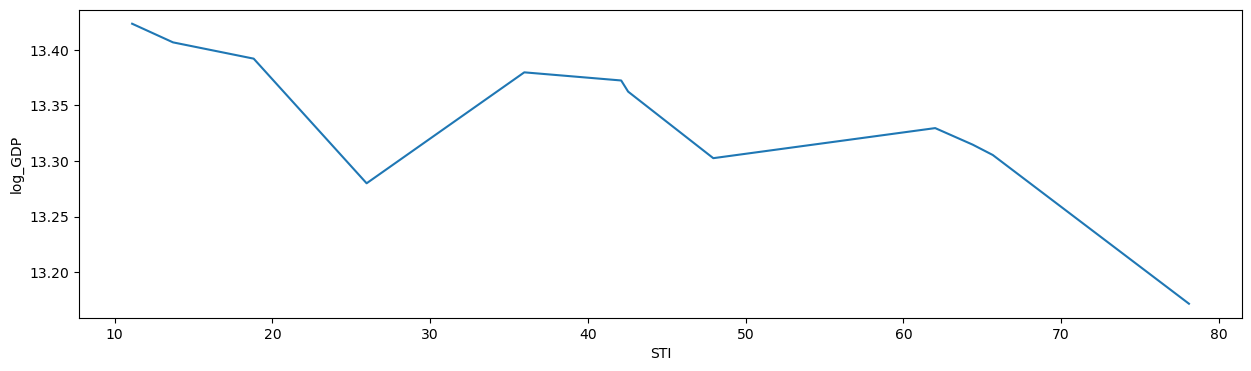

In [302]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_monthly, x='STI', y='log_GDP')

<Axes: xlabel='STI', ylabel='GDP'>

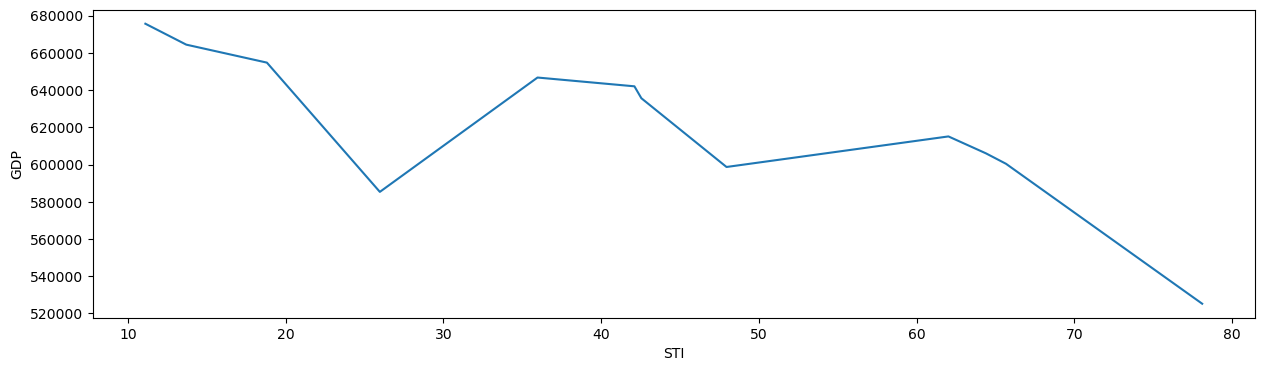

In [303]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_monthly, x='STI', y='GDP')

<Axes: ylabel='POVERTY'>

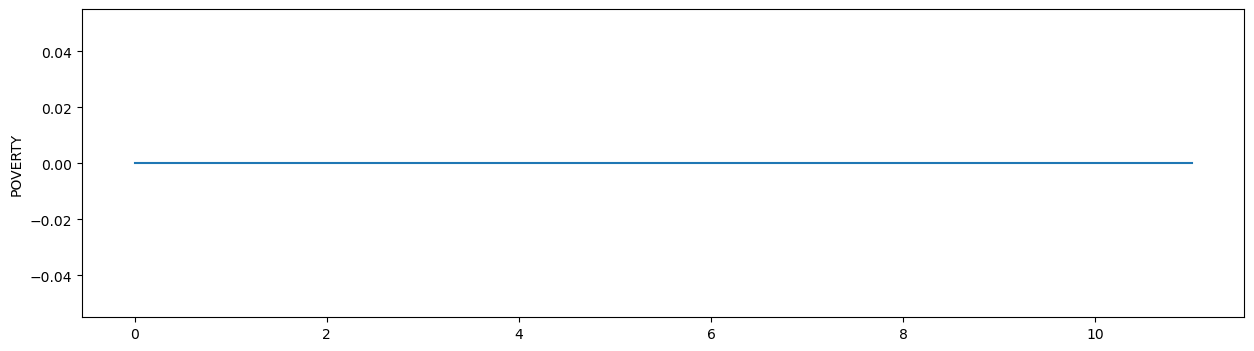

In [322]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_monthly['POVERTY'])

In [338]:
data_test = pd.read_csv('../Data/Data 2/owid-covid-data.csv')

data_test.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't